In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
data = pd.read_csv('Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
data.shape

(500, 9)

In [5]:
data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())

In [6]:
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())

In [7]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])

In [8]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
data.drop(columns=['Serial No.'],inplace=True)

In [10]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [11]:
X = data[['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research']]

In [12]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


In [13]:
y = data['Chance of Admit']

In [14]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

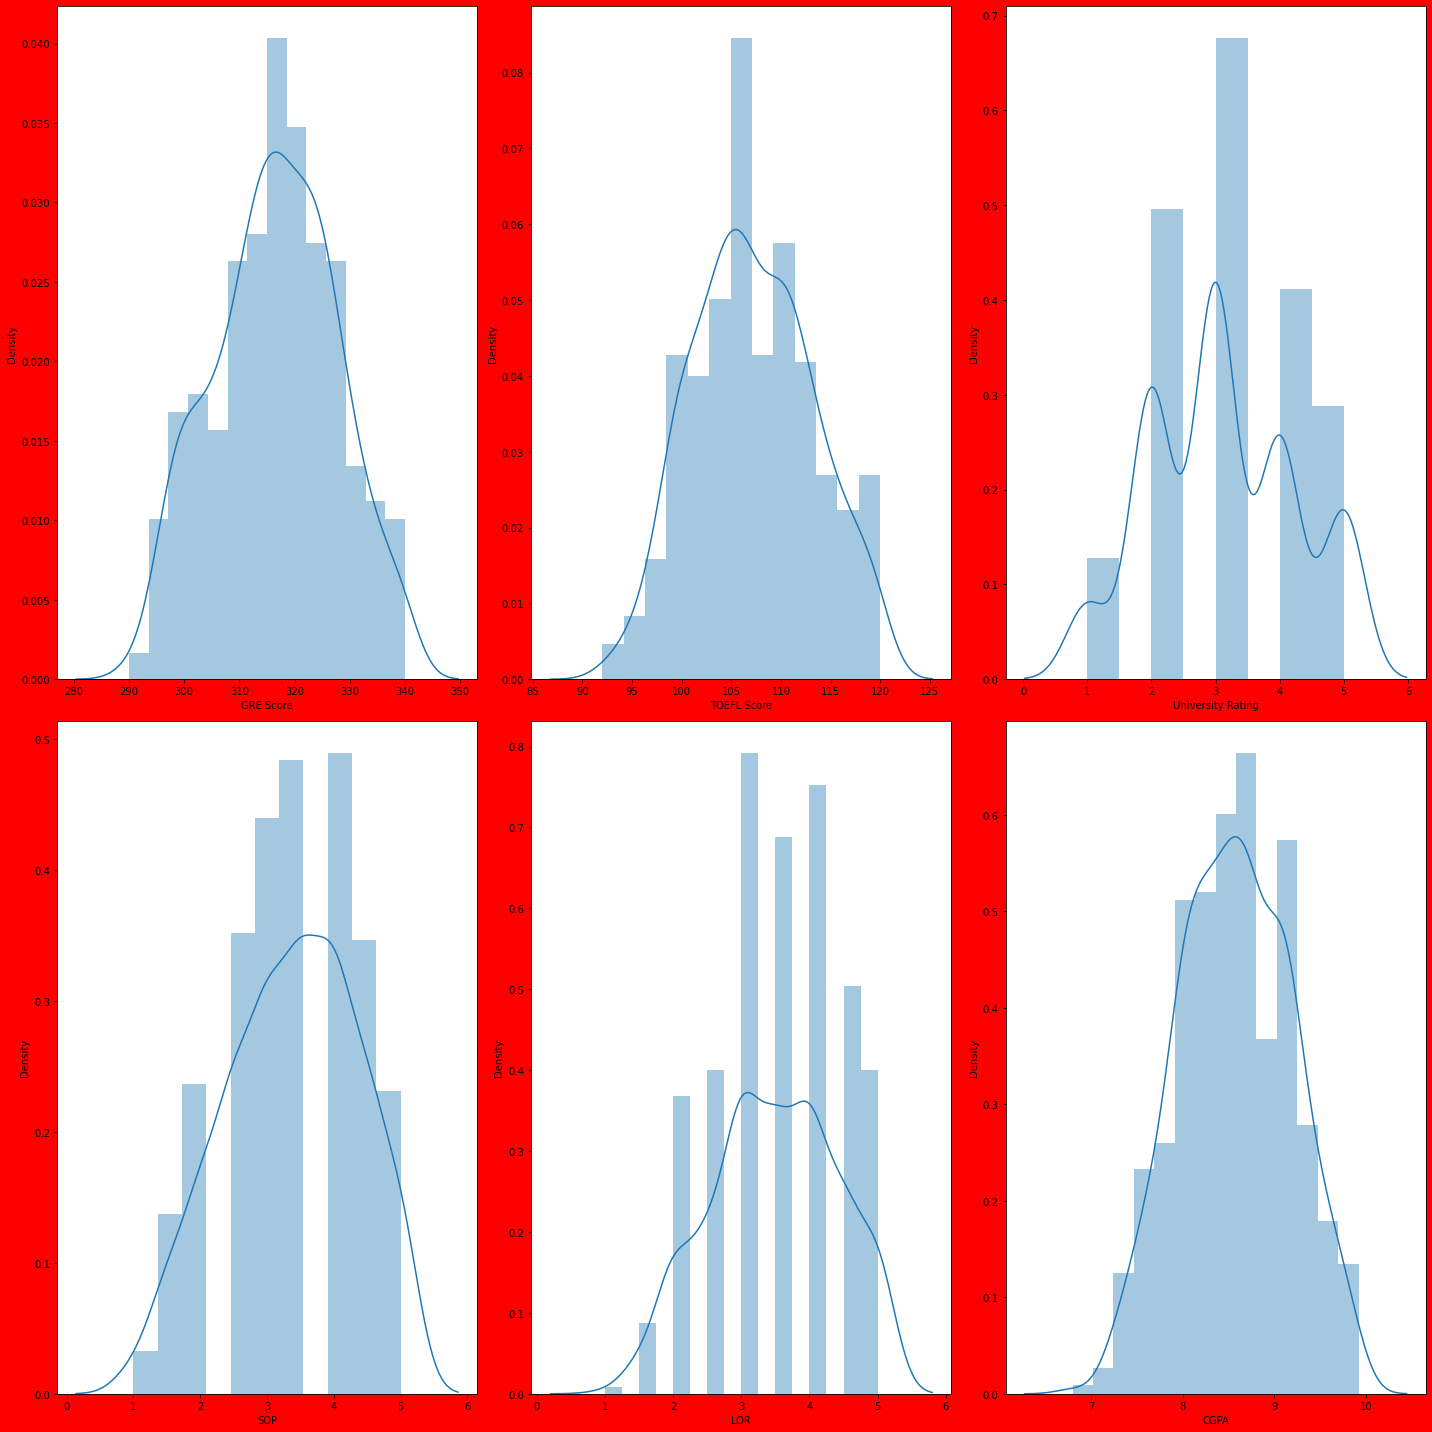

In [15]:
plt.figure(figsize=(20,20),facecolor='red')

plotnumber = 1

for column in data:
    if plotnumber<=6:
        plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.tight_layout()    
        

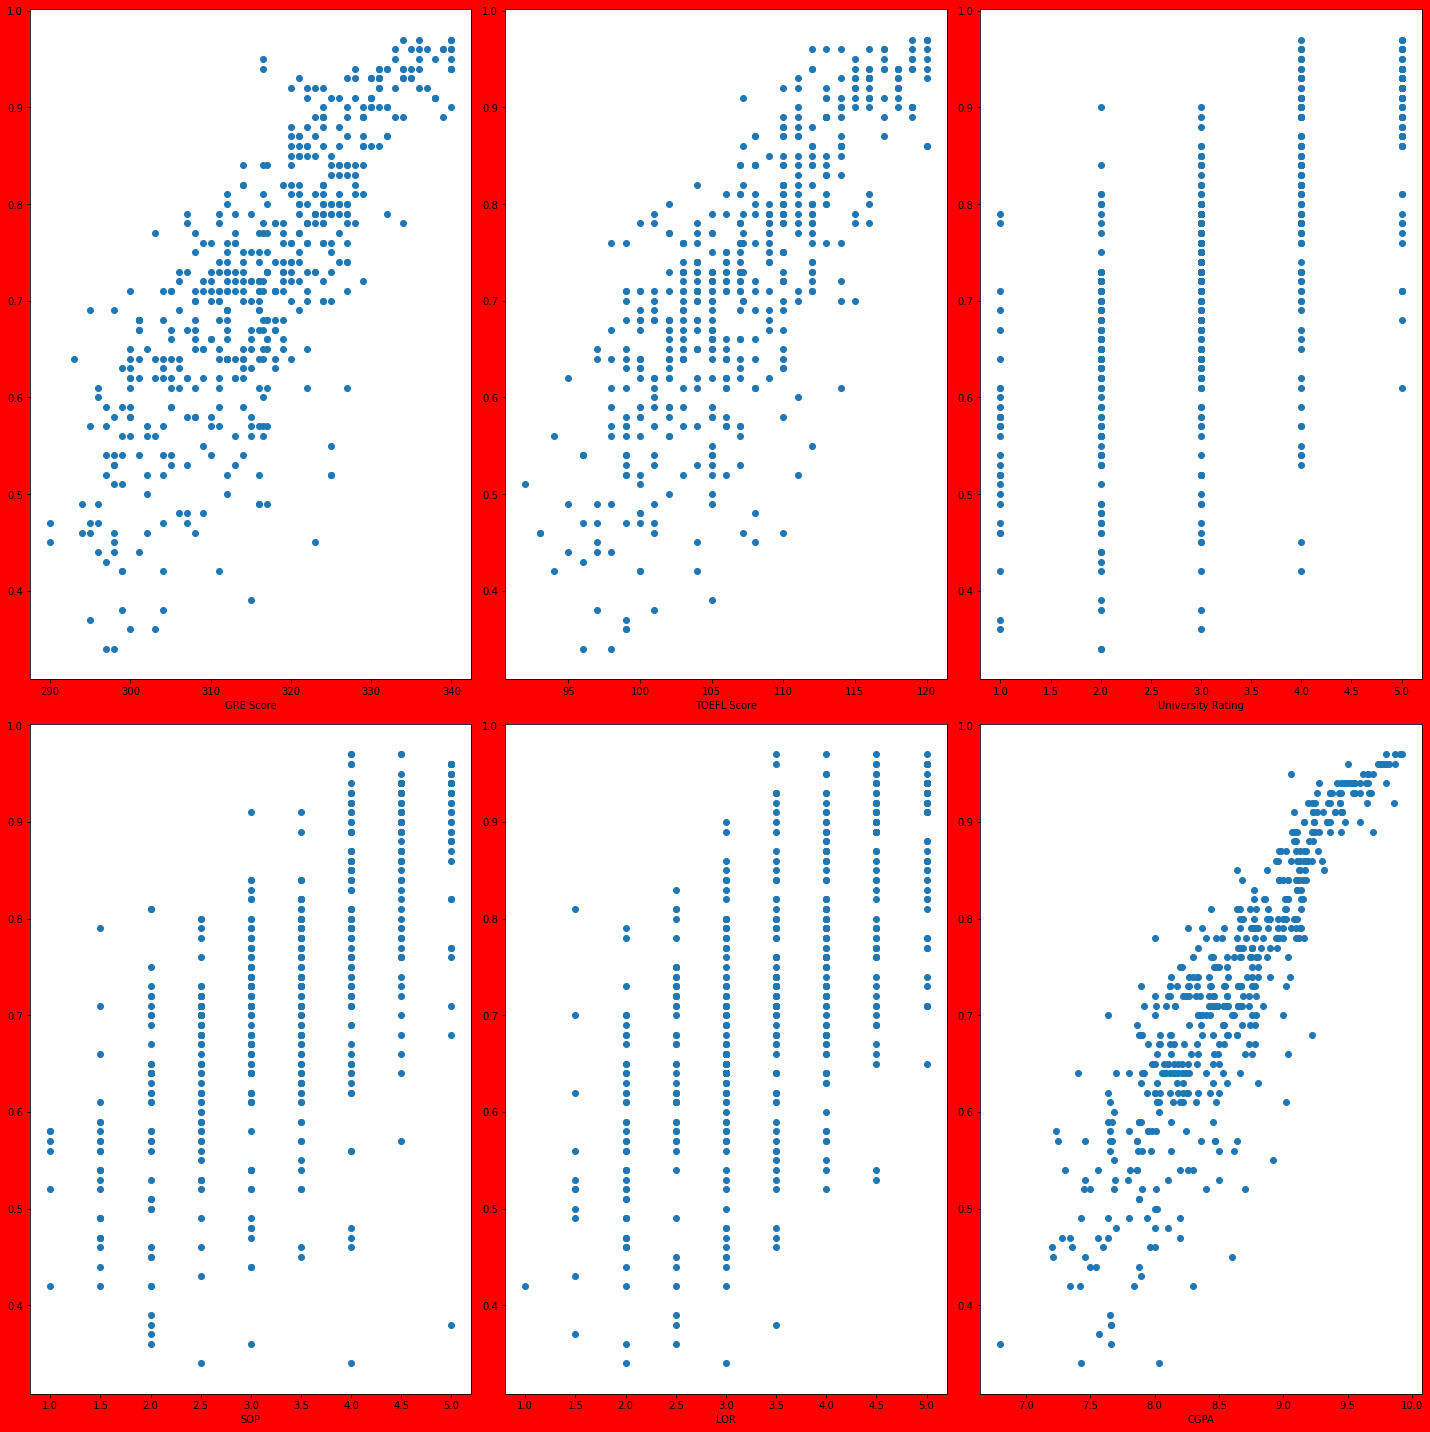

In [16]:
plt.figure(figsize=(20,20),facecolor='red')

plotnumber = 1

for column in X:
    if plotnumber<=6:
        plt.subplot(2,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column)
    
        
    plotnumber+=1
    
plt.tight_layout()   

In [17]:
scale = StandardScaler()


In [18]:
x_scale = scale.fit_transform(X)
x_scale

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=0.25,random_state=100)

In [20]:
model = LinearRegression()

In [21]:
model.fit(x_train,y_train)

LinearRegression()

In [22]:
model.predict(x_test)

array([0.86069475, 0.46961675, 0.62457559, 0.44427341, 0.64477075,
       0.85868392, 0.58505459, 0.66825273, 0.81854538, 0.68171621,
       0.66695132, 0.6130498 , 0.89289851, 0.75587611, 0.63710169,
       0.50210475, 0.59088702, 0.74925169, 0.55648151, 0.7216039 ,
       0.89836979, 0.61372014, 0.85046029, 0.82931438, 0.99434179,
       0.60241927, 0.68864148, 0.93864892, 0.88106392, 0.7079722 ,
       0.7878777 , 0.85197209, 0.75005243, 0.55035253, 0.7409322 ,
       0.7846006 , 0.79476912, 0.57813961, 0.53270814, 0.70273382,
       0.95035571, 0.59153554, 0.83491267, 0.7865929 , 0.81274368,
       0.54137961, 0.59479607, 0.87886605, 0.95285581, 0.59818408,
       0.81918166, 0.71389373, 0.80771306, 0.99224991, 0.64596821,
       0.85748512, 0.61937012, 0.89966459, 0.77296661, 0.7386618 ,
       0.68682328, 0.62638119, 0.47959271, 0.88440311, 0.65075526,
       0.68517479, 0.70480878, 0.46160814, 0.84041637, 0.84586557,
       0.9298679 , 0.77572697, 0.65973664, 0.83681099, 0.65357

In [23]:
model.score(x_train,y_train)

0.816838515195484

In [24]:
model.score(x_test,y_test)

0.8262805596865083

In [25]:
X.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
498,312.0,103.0,4.0,4.0,5.0,8.43,0
499,327.0,113.0,4.0,4.5,4.5,9.04,0


In [26]:
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [27]:
model.predict(scale.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]]))

array([0.8187231])

In [28]:
print(x_train[0])

[-0.41096436 -0.52731275 -0.10462259  0.12727117  0.01730621 -0.25891759
 -1.12815215]


In [29]:
x_train

array([[-0.41096436, -0.52731275, -0.10462259, ...,  0.01730621,
        -0.25891759, -1.12815215],
       [ 0.12992496, -0.19647633, -0.10462259, ..., -0.52351283,
         0.12174622, -1.12815215],
       [-1.13215013, -1.02356739, -0.99125473, ..., -1.06433187,
        -1.51676323, -1.12815215],
       ...,
       [-1.04200191, -0.85814918, -0.99125473, ..., -1.06433187,
        -0.65613201, -1.12815215],
       [-0.50111259, -0.85814918, -0.10462259, ...,  0.55812525,
         0.10519562,  0.88640526],
       [-1.31244657, -0.85814918, -1.87788687, ..., -2.14596996,
        -0.95404281, -1.12815215]])

In [30]:
y_train

219    0.74
391    0.71
375    0.38
19     0.62
229    0.82
       ... 
343    0.59
359    0.81
323    0.62
280    0.68
8      0.50
Name: Chance of Admit, Length: 375, dtype: float64

In [31]:
x_test

array([[ 1.03140717e+00,  1.29228759e+00,  7.82009548e-01,
         1.13735981e+00,  5.58125251e-01,  9.65826842e-01,
         8.86405260e-01],
       [-5.91260806e-01, -1.35440382e+00, -9.91254733e-01,
        -1.89290612e+00, -1.60515091e+00, -2.11258485e+00,
        -1.12815215e+00],
       [-5.01112585e-01, -6.92730965e-01, -1.04622593e-01,
        -1.38786180e+00,  5.58125251e-01, -8.05087410e-01,
        -1.12815215e+00],
       [-1.94348412e+00, -1.85065846e+00, -9.91254733e-01,
        -1.89290612e+00, -1.60515091e+00, -2.04638245e+00,
        -1.12815215e+00],
       [ 4.90517846e-01,  4.65196526e-01, -1.04622593e-01,
        -3.77773152e-01,  1.73062093e-02, -9.54042814e-01,
        -1.12815215e+00],
       [ 6.70814288e-01,  7.96032952e-01,  1.66864169e+00,
         1.64240413e+00,  1.63976333e+00,  8.33422038e-01,
         8.86405260e-01],
       [-1.13215013e+00, -3.10581135e-02, -1.04622593e-01,
         1.27271169e-01, -5.23512832e-01, -1.18575122e+00,
        -1.1281521

In [32]:
y_test

69     0.78
29     0.54
471    0.64
344    0.47
54     0.70
       ... 
46     0.86
50     0.76
78     0.44
304    0.62
478    0.71
Name: Chance of Admit, Length: 125, dtype: float64

In [33]:
y_pred = model.predict(x_test)

In [34]:
y_pred


array([0.86069475, 0.46961675, 0.62457559, 0.44427341, 0.64477075,
       0.85868392, 0.58505459, 0.66825273, 0.81854538, 0.68171621,
       0.66695132, 0.6130498 , 0.89289851, 0.75587611, 0.63710169,
       0.50210475, 0.59088702, 0.74925169, 0.55648151, 0.7216039 ,
       0.89836979, 0.61372014, 0.85046029, 0.82931438, 0.99434179,
       0.60241927, 0.68864148, 0.93864892, 0.88106392, 0.7079722 ,
       0.7878777 , 0.85197209, 0.75005243, 0.55035253, 0.7409322 ,
       0.7846006 , 0.79476912, 0.57813961, 0.53270814, 0.70273382,
       0.95035571, 0.59153554, 0.83491267, 0.7865929 , 0.81274368,
       0.54137961, 0.59479607, 0.87886605, 0.95285581, 0.59818408,
       0.81918166, 0.71389373, 0.80771306, 0.99224991, 0.64596821,
       0.85748512, 0.61937012, 0.89966459, 0.77296661, 0.7386618 ,
       0.68682328, 0.62638119, 0.47959271, 0.88440311, 0.65075526,
       0.68517479, 0.70480878, 0.46160814, 0.84041637, 0.84586557,
       0.9298679 , 0.77572697, 0.65973664, 0.83681099, 0.65357

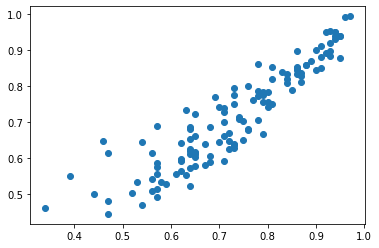

In [35]:
plt.scatter(y_test,y_pred)

In [36]:
mas = mean_absolute_error(y_test,y_pred)

In [37]:
mse = mean_squared_error(y_test,y_pred)

In [38]:
rmse = np.sqrt(mse)

In [39]:
print(mas,mse,rmse)

0.045778397291140555 0.003402884216930174 0.05833424566179093


In [40]:
import pickle

pickle.dump(model,open('admin.pickle','wb'))

In [41]:
load_model = pickle.load(open('admin.pickle','rb'))
b = load_model.predict(x_test)

In [42]:
b

array([0.86069475, 0.46961675, 0.62457559, 0.44427341, 0.64477075,
       0.85868392, 0.58505459, 0.66825273, 0.81854538, 0.68171621,
       0.66695132, 0.6130498 , 0.89289851, 0.75587611, 0.63710169,
       0.50210475, 0.59088702, 0.74925169, 0.55648151, 0.7216039 ,
       0.89836979, 0.61372014, 0.85046029, 0.82931438, 0.99434179,
       0.60241927, 0.68864148, 0.93864892, 0.88106392, 0.7079722 ,
       0.7878777 , 0.85197209, 0.75005243, 0.55035253, 0.7409322 ,
       0.7846006 , 0.79476912, 0.57813961, 0.53270814, 0.70273382,
       0.95035571, 0.59153554, 0.83491267, 0.7865929 , 0.81274368,
       0.54137961, 0.59479607, 0.87886605, 0.95285581, 0.59818408,
       0.81918166, 0.71389373, 0.80771306, 0.99224991, 0.64596821,
       0.85748512, 0.61937012, 0.89966459, 0.77296661, 0.7386618 ,
       0.68682328, 0.62638119, 0.47959271, 0.88440311, 0.65075526,
       0.68517479, 0.70480878, 0.46160814, 0.84041637, 0.84586557,
       0.9298679 , 0.77572697, 0.65973664, 0.83681099, 0.65357

In [45]:
from sklearn.linear_model import LassoCV,Lasso,RidgeCV,Ridge

In [46]:
lcv = LassoCV(alphas=None,max_iter=100,normalize=True)

In [49]:
lcva = lcv.fit(x_train,y_train)

In [50]:
alpha = lcva.alpha_

In [51]:
lasso_reg = Lasso(alpha)

In [52]:
lasso_reg.fit(x_train,y_train)

Lasso(alpha=2.7745719225519347e-05)

In [53]:
lasso_reg.score(x_test,y_test)

0.8263177676395763

In [56]:
rcv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)

In [57]:
rcv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [59]:
alphar = rcv.alpha_

In [60]:
ri_re = Ridge(alphar)

In [61]:
ri_re.fit(x_train,y_train)

Ridge(alpha=0.011)

In [62]:
ri_re.score(x_test,y_test)

0.8262843148544313

In [ ]:
# we dont have any case of overfitting